### Tasca M5 T01

#### Exercicis d'Hipotesis Testing.
- **Exercici 1**
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 



- **Exercici 2**
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.



- **Exercici 3**
Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

**PREPARACIÓN DEL DATASET, PRIMERA OBSERVACIÓN**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scikit_posthocs import posthoc_nemenyi
#import libreries to statitics
from scipy import stats
from scipy.stats import shapiro, pearsonr, spearmanr, f_oneway
import warnings
warnings.filterwarnings('ignore') #nose porque se ignoran

In [75]:
cd /Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/SPRINT 5

/Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/SPRINT 5


In [76]:
dfO = pd.read_csv('Lligues europees UEFA.csv', encoding="latin-1", sep=';')
pd.set_option('display.max_columns', None);

In [77]:
dfO.tail(5)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,-35,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,-56,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul
97,98,Greuther Fürth,GER,18,34,3,9,22,28,82,-54,18,0.53,30.7,60.3,-29.6,-0.87,D L D L L,7672,Branimir Hrgota - 9,Sascha Burchert


In [78]:
dfO['Country'].unique()

array(['ENG', 'ESP', 'GER', 'FRA', 'ITA'], dtype=object)

##### DataSet donde se nos muestran estadísticas sobre partidos jugados en la liga europea: goles, resultados, máximos goleadores... de 5 equipos de los países más significativos que la componen (Inglaterra, España, Alemania, Francia, Italia).

Aclaración de nomenclaturas usadas en las :
- **Rk:** Ranking.
- **Squad:** Nombre equipo.
- **Country:** País al que pertenece el equipo.
- **LgRk:** Ranking en la liga.
- **MP:** Partidos totales jugados (W+D+L).
- **W:** Partidos ganados "wins".
- **D:** Partidos empatados "Draws".
- **L:** Partidos perdidos "Lose".
- **GF:** Goles a favor "goals for".
- **GA:** Goles en contra "goals againist".
- **GD:** Diferencia de goles "goals difference" (Goles a Favor - Goles en contra).
- **Pts:** Puntos totales en la liga (Wx3 + Dx1).

Los partidos ganados (W) se multiplican por 3.
Los partidos empatados (D) se multiplican por 1.
Los partidos perdidos (L) se multiplican por 0 (ya que no otorgan puntos).


- **Pts/G:** Media de puntos por partido (Pts/MP). Nos ayuda a definir el rendimiento: Pts/G=MP/Pts.

- **xG:** Goles a favor esperados en una liga "expected goals". (probabilidad de conversión de oportunidades de gol en goles, pero no se calculan en tiempo real durante un partido.
- **xGA:** Goles en contra esperados en una liga "expected goals againist".
- **xGD:** Diferencia entre los goles esperados a favor y en contra (xG-xGA) "expected goals difference".
- **xGD/90:** Diferencia de goles esperada por cada partido "90'"(xGD/MP) "expected".
- **Last 5:** Los resultados en los 5 últimos partidos.
- **Attendance:** Asistencia media a los partidos en cuanto a público se refiere.
- ***Top Team Scorer:*** Nombre del máximo goleador del equipo (será columna ***TTName***) y Número de goles (será columna ***TTNum***). 
- **Goalkeeper:** Nombre del portero titular.

In [79]:
#Comprobamos si hay valores nulos
dfn= dfO.isna().sum().sum()
#(df.isnull().sum()) si quisiera lista.
print ("La cantidad de valores NaN en la tabla es:",dfn)

La cantidad de valores NaN en la tabla es: 0


In [80]:
# comprobamos si hay duplicados
dfs = dfO.loc[dfO.duplicated()].sum().sum()
print ("La cantidad de duplicados en la tabla es:",dfs)

La cantidad de duplicados en la tabla es: 0.0


In [81]:
dfn = dfO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

- Me dispongo a dividir la columna mencionada anteriormente en: Nombre del goleador (TTName) y Número de goles (TTNum).

In [82]:
df = dfO.copy()
df['TTName'] = df['Top Team Scorer'].str.extract(r'([a-zA-Z\s]+)')
df['TTNum'] = df['Top Team Scorer'].str.extract(r'(\d+)')

df.tail(5)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,TTName,TTNum
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil,Hwang Ui,11
94,95,Venezia,ITA,20,37,6,8,23,34,69,-35,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero,Thomas Henry,9
95,96,Watford,ENG,19,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster,Emmanuel Dennis,10
96,97,Norwich City,ENG,20,37,5,7,25,23,79,-56,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul,Teemu Pukki,11
97,98,Greuther Fürth,GER,18,34,3,9,22,28,82,-54,18,0.53,30.7,60.3,-29.6,-0.87,D L D L L,7672,Branimir Hrgota - 9,Sascha Burchert,Branimir Hrgota,9


- Una vez comprobado que funciona, elimino la antigua columna en un nuevo df

In [83]:
df.drop('Top Team Scorer', axis=1, inplace=True)

In [84]:
df.head(2).sort_values(by='LgRk')

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Goalkeeper,TTName,TTNum
0,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Ederson,Kevin De Bruyne,15
1,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Alisson,Mohamed Salah,22


- Convertimos la columna TTNum a Numero íntegro.

In [85]:
df['TTNum']= df['TTNum'].astype(int)

In [86]:
df.describe().round(1)

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,TTNum
count,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0
mean,49.5,10.3,36.3,13.4,9.4,13.4,50.9,50.9,0.0,49.7,1.4,48.7,48.6,-0.0,0.0,24239.9,12.6
std,28.4,5.7,1.2,5.7,2.9,5.1,16.1,13.6,26.5,16.2,0.4,12.5,9.8,20.0,0.6,14874.2,5.5
min,1.0,1.0,34.0,3.0,3.0,2.0,23.0,24.0,-56.0,18.0,0.5,28.2,26.8,-40.4,-1.1,5870.0,5.0
25%,25.2,5.2,36.0,9.0,7.0,10.0,39.0,40.0,-17.8,37.0,1.0,39.1,41.3,-13.6,-0.4,12355.5,9.0
50%,49.5,10.0,37.0,13.0,9.0,13.0,47.0,50.0,-1.0,46.0,1.3,46.4,47.8,-1.1,-0.0,20491.0,11.0
75%,73.8,15.0,37.0,17.0,11.0,17.0,60.0,59.0,17.2,61.8,1.7,55.6,54.7,12.8,0.4,32382.0,15.0
max,98.0,20.0,37.0,28.0,16.0,26.0,97.0,89.0,72.0,90.0,2.4,88.1,73.3,59.3,1.6,73150.0,35.0


- Voy a filtrar los Partidos con más público.

In [87]:
max_attendance = df['Attendance'].max()
df[df['Attendance'] == max_attendance]
df.nlargest(8, 'Attendance').sort_values(by='Attendance',ascending=False)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Goalkeeper,TTName,TTNum
33,34,Manchester Utd,ENG,6,37,16,10,11,57,56,1,58,1.57,53.9,54.3,-0.4,-0.01,L L D W L,73150,David de Gea,Cristiano Ronaldo,18
17,18,Arsenal,ENG,5,36,21,3,12,56,45,11,66,1.83,56.3,44.0,12.2,0.34,W W W W L,59636,Aaron Ramsdale,Bukayo Saka,11
36,37,West Ham,ENG,7,37,16,8,13,59,48,11,56,1.51,49.8,49.4,0.4,0.01,D L L W D,58370,?ukasz Fabia?ski,Jarrod Bowen,12
14,15,Tottenham,ENG,4,37,21,5,11,64,40,24,68,1.84,61.5,39.0,22.5,0.61,D W D W W,56234,Hugo Lloris,Son Heung,21
9,10,Barcelona,ESP,2,37,21,10,6,68,36,32,73,1.97,61.3,35.2,26.1,0.71,L W W W D,53933,Marc-André ter Stegen,Memphis Depay,12
1,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Alisson,Mohamed Salah,22
0,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Ederson,Kevin De Bruyne,15
61,62,Newcastle Utd,ENG,14,36,11,10,15,40,61,-21,43,1.19,36.5,53.5,-16.9,-0.47,W W W L L,51443,Martin Dúbravka,Callum Wilson,6


- Observo que el equipo con más asistencia de público, es Inglaterra. Y debe ser un tema cultural o de capacidad de aforo. Puesto que, por ejemplo, el Manchester Utd, ocupa la primera posicición en cuanto a aforo (estando mucho más por encima que la media) y no es de los equipos en las primeras posiciones del Ranking de la Liga (estando en posición 6).

- El Barça, es el único equipo español dentro de esta lista de Top 8 en público. Pero es el único que destaca en el Ranking por estar número 1.

- Siento curiosidad para ver que hay en este pico de la posición 1.

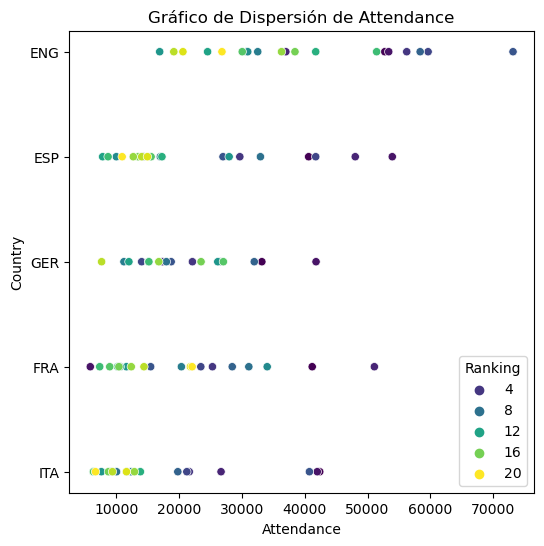

In [88]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="Attendance", y="Country", hue="LgRk", palette="viridis")
df['LgRk'] = pd.Categorical(df['LgRk'])
# para que me salgan todos los números en relación a la paleta de colores
plt.xlabel("Attendance")
plt.ylabel("Country")
plt.title("Gráfico de Dispersión de Attendance")
plt.legend(title="Ranking")
df['LgRk'] = pd.Categorical(df['LgRk'])

# Muestra el gráfico
plt.show()

- En esta gráfica, podemos observar que el aforo tiene una relación bastante significativa con los partidos "más buenos" , los que ocupan primeras posiciones en el ranking de la Liga. 

- También observamos que con los equipos de Inglaterra, siempre hay mucho más aforo en general.

- Tengo curiosidad en dos valores atípicos: 

1.- El valor atípico (Outlier) en cuanto a aforo: el  que tiene el máximo aforo. Y en la lista anterior hemos visto que estaba en la posición 6 del Ranking (ahora en la gráfica color azul oscuro). a simple vista, no hay nada a destacar en ningún dato a excepción quizás del máximo goleador, que debe ser espectáculo asegurado.

2.- El valor atípico en cuanto a Ranking y poco aforo, del equipo francés.

**1.- Valor atípico en cuanto a aforo máximo:**

In [89]:
df['TTName'] = df['TTName'].str.strip() # función para limpiar columna TTName de espacios o caracteres. Porque no me salía la primera vez el filtrado. 

In [90]:
ronaldo = df[df['TTName'] == 'Cristiano Ronaldo']
ronaldo

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Goalkeeper,TTName,TTNum
33,34,Manchester Utd,ENG,6,37,16,10,11,57,56,1,58,1.57,53.9,54.3,-0.4,-0.01,L L D W L,73150,David de Gea,Cristiano Ronaldo,18


Podemos observar que es el único partido en el que juega Cristiano Ronaldo, y además dentro del Equipo de Inglaterra que como vemos en la gráfica  son de los que tienen más asistencia.

**2.- Valor atípico en cuanto a aforo mínimo y ranking de liga:**

In [91]:
france = df[df['Country'] == 'FRA']
france.sort_values('Attendance').head(5)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Goalkeeper,TTName,TTNum
13,14,Monaco,FRA,2,37,20,8,9,63,38,25,68,1.84,56.8,39.7,17.1,0.46,W W W W W,5870,Alexander Nübel,Wissam Ben Yedder,24
70,71,Angers,FRA,14,37,9,11,17,42,55,-13,38,1.03,42.6,47.7,-5.0,-0.14,L D L W L,7370,Danijel Petkovi?,Sofiane Boufal,8
72,73,Troyes,FRA,15,37,9,10,18,36,52,-16,37,1.00,39.0,49.6,-10.6,-0.29,L L W D L,8963,Gauthier Gallon,Xavier Chavalerin Ike Ugbo,5
62,63,Montpellier,FRA,13,37,12,7,18,49,59,-10,43,1.16,42.4,56.5,-14.1,-0.38,L L D L L,10218,Jonas Omlin,Sepe Elye Wahi,10
79,80,Clermont Foot,FRA,16,37,9,9,19,37,67,-30,36,0.97,42.7,51.0,-8.3,-0.22,W D L W L,10425,Ouparine Djoco,Mohamed Bayo,13


In [92]:
df['Squad'] = df['Squad'].str.strip()
monaco = df[df['Squad'] == 'Monaco']
monaco

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Goalkeeper,TTName,TTNum
13,14,Monaco,FRA,2,37,20,8,9,63,38,25,68,1.84,56.8,39.7,17.1,0.46,W W W W W,5870,Alexander Nübel,Wissam Ben Yedder,24


- Me da a entender, que aunque el equipo de Mónaco es muy respetable, y tiene un estadio con gran capacidad (18.500 personas aprox)... no deja de ser un país que mide 2Km2 y con una población de 36.686 habitantes. 

- Si jugaron en casa y proporcionalmente asistieron 5870 personas, supone un 15% de la población (tomar en cuenta que no todos los asistentes serían del mónaco).

Esta podria ser la razón del porqué, siendo un equipo que quedó segundo en el ranking de la liga, tuvo tan poco aforo.

AÑADO UN MAPA DE CORRELACIÓN GENERAL DEL DATAFRAME

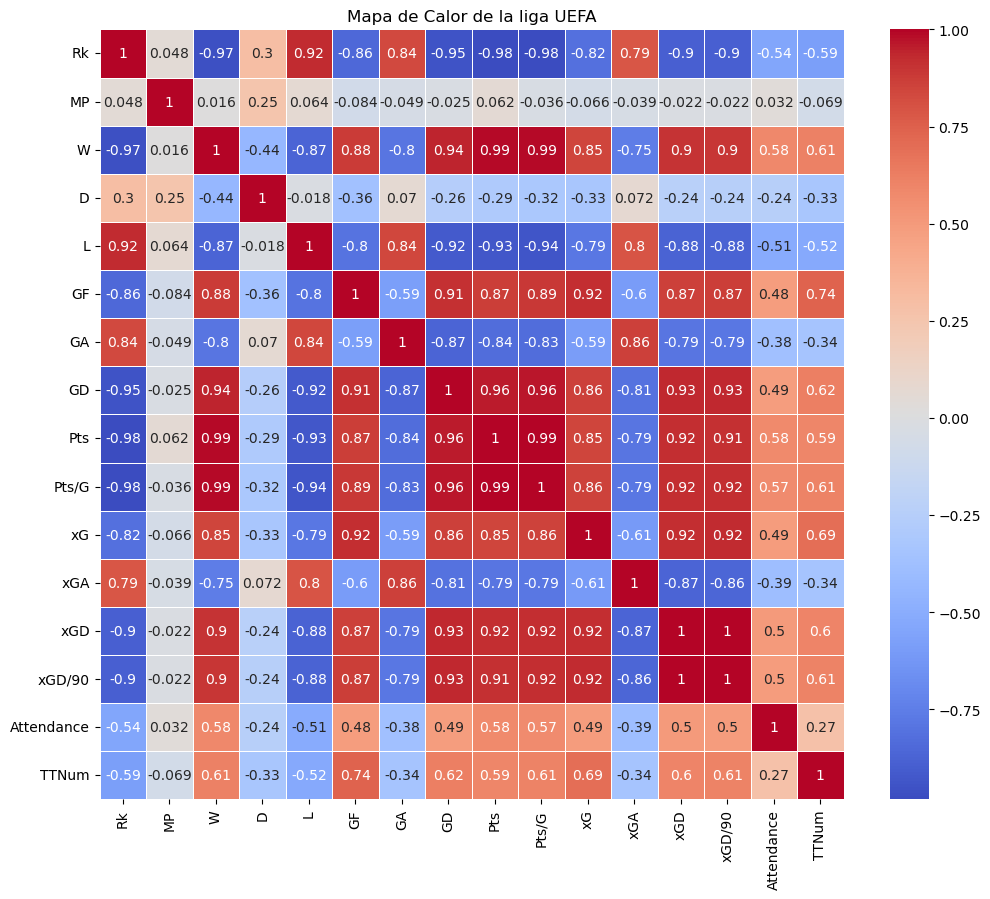

In [93]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Personalizar el gráfico
plt.title("Mapa de Calor de la liga UEFA")

# Mostrar el gráfico
plt.show()

- También quiero hacer observación de las curvas de las variables numéricas.

array([[<Axes: title={'center': 'MP'}>, <Axes: title={'center': 'W'}>,
        <Axes: title={'center': 'D'}>, <Axes: title={'center': 'L'}>],
       [<Axes: title={'center': 'GF'}>, <Axes: title={'center': 'GA'}>,
        <Axes: title={'center': 'GD'}>, <Axes: title={'center': 'Pts'}>],
       [<Axes: title={'center': 'Pts/G'}>,
        <Axes: title={'center': 'xG'}>, <Axes: title={'center': 'xGA'}>,
        <Axes: title={'center': 'xGD'}>],
       [<Axes: title={'center': 'xGD/90'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

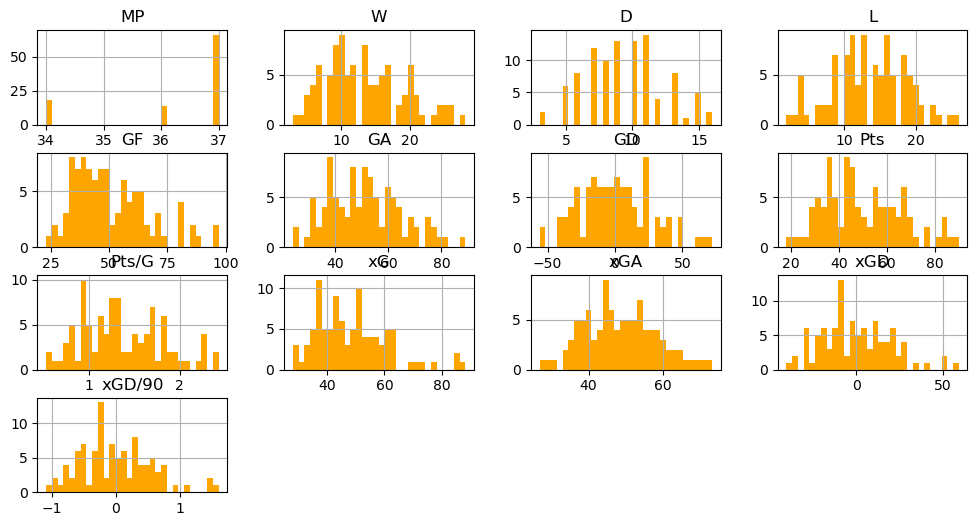

In [121]:
plt.figsize=(14, 8)
df[['LgRk','MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/G','xG','xGA','xGD','xGD/90']].hist(bins=30, figsize=(12,6), color="orange")

### Exercici 1 (1 Variable)
Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

**1ª PRUEBA DE NORMALIDAD con "Prueba de Shapiro-Wilk"** 

Prueba si una muestra de datos tiene una distribución GAUSSIANA.

    - Suposiciones
Las observaciones en cada muestra son independientes y están distribuidas idénticamente (iid).

    - Interpretación
H0: **La categoría de rendimiento (Pts/G), tiene una distribución gaussiana.**

H1: La categoría de rendimiento (Pts/G), NO tiene una distribución gaussiana.

In [95]:
PUNTOS = df['Pts/G'] 
stat, p = shapiro(PUNTOS) #también: stat, p = stats.shapiro(PUNTOS)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Hipótesis 0, distribución probablemente Gaussiana')
else:
 print('Hipótesis 1, distribución probablemente no Gaussiana')

stat=0.972, p=0.035
Hipótesis 1, distribución probablemente no Gaussiana


- El valor p obtenido (0.035) es menor que 0.05, por lo tanto, con un nivel de significancia común de 0.05, se rechaza la hipótesis nula, lo que sugiere que los datos no siguen una distribución normal. Esto significa que la distribución de los datos es probablemente no gaussiana.

A continuación mostramos dos gráficos para representar visualmente:
- la curva (con el GRÁFICO DE DENSIDAD) 
- y la distancia de los puntos con la distribución normal (GRÁFICO QQ).

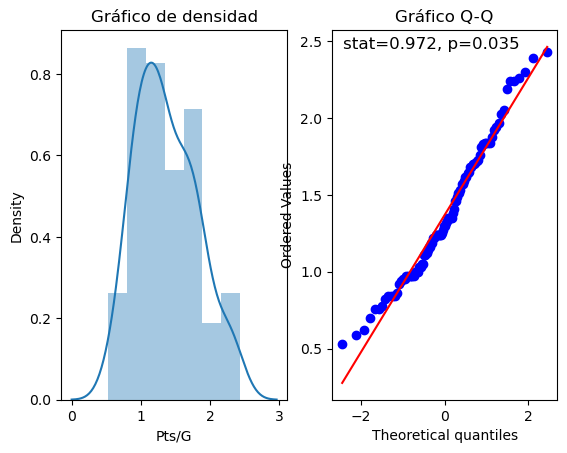

In [96]:
fig, axs = plt.subplots(nrows=1, ncols=2)

sns.distplot(PUNTOS, ax=axs[0]);
axs[0].set_title('Gráfico de densidad');
textstat = 'stat=0.972, p=0.035'
stats.probplot(PUNTOS.values, dist='norm', plot=plt)
axs[1].set_title('Gráfico Q-Q')
plt.text(0.05, 0.95, textstat, transform=plt.gca().transAxes, fontsize=12, color='black')


plt.show()

- Aplico una segunda prueba de Normalidad a las mimsmas hipótesis, con la prueba de Anderson-Darling. Porque esta devuelve una lista de valores críticos en lugar de un único valor P. 

- Esto puede proporcionar la base para una interpretación más exhaustiva del resultado: 

**2ª PRUEBA DE NORMALIDAD con "Prueba de Anderson-Darling"**

También prueba si una muestra de datos tiene una distribución gaussiana.

    - Suposiciones
Las observaciones en cada muestra son independientes y están distribuidas idénticamente (iid).

    - Interpretación
H0: **La categoría de rendimiento (Pts/G), tiene una distribución gaussiana.**

H1: La categoría de rendimiento (Pts/G), NO tiene una distribución gaussiana.

In [97]:
PUNTOS = df['Pts/G']
result = stats.anderson(PUNTOS, dist='norm')

# Imprime el estadístico de Anderson-Darling y los valores críticos
print('Estadístico de Anderson-Darling:', result.statistic)
print('Valores críticos:', result.critical_values)

# Compara el estadístico con los valores críticos para determinar si los datos siguen una distribución normal
if result.statistic < result.critical_values[2]:
    print('Hipótesis 0, distribución probablemente Gaussiana')
else:
    print('Hipótesis 1, distribución probablemente no Gaussiana')

Estadístico de Anderson-Darling: 0.8061873585912309
Valores críticos: [0.555 0.632 0.758 0.884 1.052]
Hipótesis 1, distribución probablemente no Gaussiana


- El estadístico de Anderson-Darling (0.8062) es mayor que los valores críticos (0.555, 0.632, 0.758, 0.884, 1.052). Por lo tanto, se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal. 

- Como Pearson se aplica solo a variables normales, voy a comprobar que las variables (D) partidos empatados y (L), lo son:

### Exercici 2 (2 Variables)
Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.


**1ª PRUEBA DE CORRELACIÓN con "COEFICIENTE DE CORRELACIÓN DE PEARSON"**

Prueba si dos muestras (Puntos y asistencia del público) tienen una ***relación LINEAL.***

    - Suposiciones
- Las observaciones en cada muestra son independientes y están distribuidas idénticamente (iid).
- Las observaciones en cada muestra se distribuyen normalmente.
- Las observaciones en cada muestra tienen la misma varianza.


        - Interpretación
    
H0: ***El Número partidos empatados (D) y el número de partidos perdidos (L) són independientes.***

H1: existe una dependencia entre el número de partidos empatados (D) y el número de partidos perdidos (L).

In [104]:
empates = df['D'] 
stat, p = shapiro(empates) #también: stat, p = stats.shapiro(PUNTOS)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Hipótesis 0, distribución probablemente Gaussiana')
else:
 print('Hipótesis 1, distribución probablemente no Gaussiana')

stat=0.977, p=0.081
Hipótesis 0, distribución probablemente Gaussiana


In [105]:
publico = df['L'] 
stat, p = shapiro(publico) #también: stat, p = stats.shapiro(PUNTOS)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Hipótesis 0, distribución probablemente Gaussiana')
else:
 print('Hipótesis 1, distribución probablemente no Gaussiana')

stat=0.988, p=0.558
Hipótesis 0, distribución probablemente Gaussiana


- Como ambas tienen distribución probablemente Gaussiana (Normal), aplico el coeficiente de correlación de Pearson.

In [108]:
dataL = df['L']
dataD = df['D']

stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print("Hipotesis 0: Probablemente independiente")
else:
    if stat > 0:
        print("Hipotesis 1: Probablemente dependiente (Correlación positiva)")
    else:
        print("Hipotesis 1: Probablemente dependiente (Correlación negativa)")

stat=0.275, p=0.006
Hipotesis 1: Probablemente dependiente (Correlación positiva)


- Una correlación positiva implica que, en general, cuando el número de partidos empatados aumenta, el número de partidos perdidos tiende a aumentar también. O sea que los equipos que empatan más partidos tienden a perder más partidos también.

**2ª PRUEBA DE CORRELACIÓN con "CORRELACIÓN DE RANGO DE SPEARMAN"**

Prueba si dos muestras (Puntos y asistencia del público) tienen una ***relación LINEAL.***

    - Suposiciones

- Las observaciones en cada muestra son independientes y están distribuidas idénticamente (iid).
- Las observaciones en cada muestra se pueden clasificar.

        - Interpretación
    
H0: ***El Número de goles del máximo goleador (TTNum) y la asistencia del público (Assistance) són independientes.***

H1: existe una dependencia entre el número de goles del máximo goleador (TTNum) y la asistencia del público.

- Primero verifico que las dos variables a comparar no tienen una distribución normal, a fin de aplicar Spearman’s Rank Correlation.

In [111]:
empates = df['Attendance'] 
stat, p = shapiro(empates) #también: stat, p = stats.shapiro(PUNTOS)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Hipótesis 0, distribución probablemente Gaussiana')
else:
 print('Hipótesis 1, distribución probablemente no Gaussiana')

stat=0.907, p=0.000
Hipótesis 1, distribución probablemente no Gaussiana


In [122]:
GOLES = df['TTNum'] 
stat, p = shapiro(GOLES) #también: stat, p = stats.shapiro(PUNTOS)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Hipótesis 0, distribución probablemente Gaussiana')
else:
 print('Hipótesis 1, distribución probablemente no Gaussiana')

stat=0.883, p=0.000
Hipótesis 1, distribución probablemente no Gaussiana


- Procedo a realizar la prueba de Spearman:

In [113]:
data1 = df['Attendance']
data2 = df['TTNum']

stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print("Hipotesis 0: Probablemente independiente")
else:
    if stat > 0:
        print("Hipotesis 1: Probablemente dependiente (Correlación positiva)")
    else:
        print("Hipotesis 1: Probablemente dependiente (Correlación negativa)")

stat=0.256, p=0.011
Hipotesis 1: Probablemente dependiente (Correlación positiva)


- Un valor de 0.256 indica una correlación positiva pero débil (las variables tienden a aumentar juntas), a medida que los valores de una variable aumentan, los valores de la otra también, aunque la relación no es muy fuerte (magnitud moderada).

- Esto nos da a entender que sí, hay una dependencia entre el número de goles del máximo goleador y la asistencia al público. Así que si juega un goleador que suele marcar un número alto de goles, hay más asistencia de público que va a ver al equipo jugar.

- Encontramos un caso evidente, cuando hemos corraborado antes que el Valor atípico del nivel máximo de asistencia al público, se disparaba cuando jugaba Cristiano Ronaldo.

**Añado un gráfico de dispersión donde además se muestre el valor P**

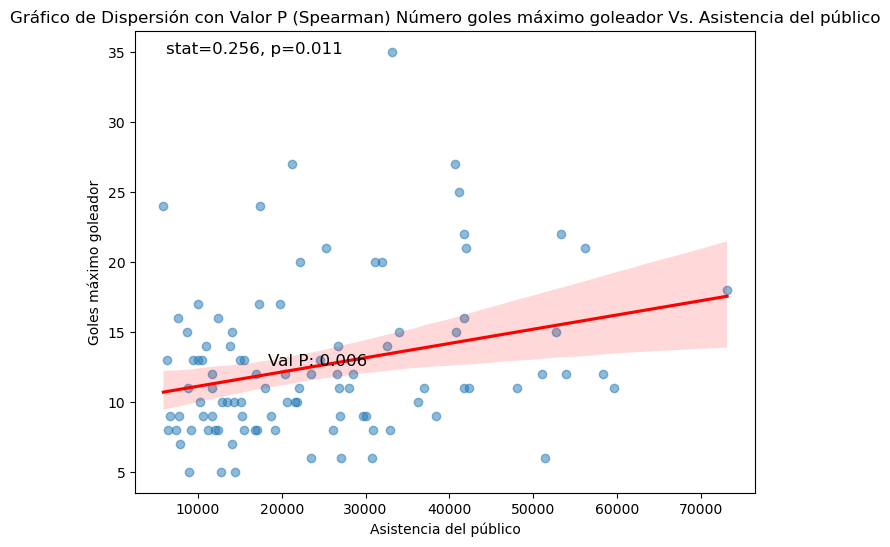

In [115]:
# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(data1, data2, alpha=0.5)

# Agregar un texto con los valores de stat y p en la esquina superior izquierda
text1= 'stat=0.256, p=0.011'
plt.text(0.05, 0.95, text1, transform=plt.gca().transAxes, fontsize=12, color='black')


# Agregar el valor p como texto en el gráfico
plt.text(np.mean(data1), np.mean(data2), f'Val P: {p_value:.3f}', fontsize=12, ha='center')
sns.regplot(x=data1, y=data2, color='red', scatter=False)
plt.title("Gráfico de Dispersión con Valor P (Spearman) Número goles máximo goleador Vs. Asistencia del público")
plt.xlabel("Asistencia del público")
plt.ylabel("Goles máximo goleador")

plt.show()

**3ª PRUEBA DE CORRELACIÓN con "CORRELACIÓN DE RANGO DE SPEARMAN"** 

Prueba si dos muestras tienen una ***relación MONÓTONA.***

    - Suposiciones
- Las observaciones en cada muestra, partidos empatados (D) y la asistencia del público (Attendance) son independientes y están distribuidas idénticamente (iid).
- Las observaciones en cada muestra (D y Attendance) se pueden clasificar.

       - Interpretación
- H0: las dos muestras, partidos empatados (D) y asistencia del público (Attendance) son independientes.
- H1: existe una dependencia entre las muestras (D y Attendance).

In [116]:
data3=df['D']
data4= df['Attendance']
stat, p = spearmanr(data3, data4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("Hipotesis 0: Probablemente independiente")
else:
    if stat > 0:
        print("Hipotesis 1: Probablemente dependiente (Correlación positiva)")
    else:
        print("Hipotesis 1: Probablemente dependiente (Correlación negativa)")

stat=-0.199, p=0.049
Hipotesis 1: Probablemente dependiente (Correlación negativa)


- Observamos en los resultados, que el valor de Spearman es negativo, lo que sugiere que a medida que los valores de una variable aumentan, los valores de la otra variable tienden a disminuir de manera consistente.

- El valor P (0.049) es menor que un nivel de significancia elegido (0.05). Esto nos sugiere que la correlación es estadísticamente significativa.

- Las variables están probablemente relacionadas de manera negativa.

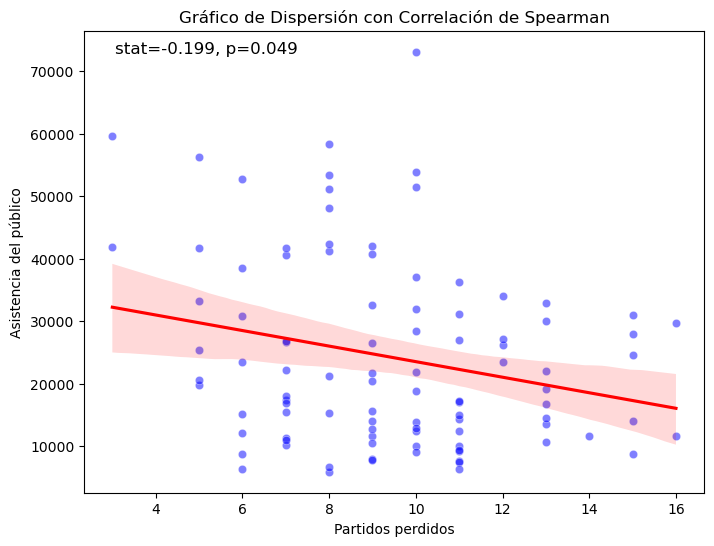

In [117]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='D', y='Attendance', color='blue', alpha=0.5)

# Agregar una línea de tendencia (regresión lineal)
sns.regplot(x=data3, y=data4, color='red', scatter=False)
#también: sns.regplot(data=df, x='D', y='Attendance', color='red', scatter=False)

# Agregar un texto con los valores de stat y p en la esquina superior izquierda
text1= 'stat=-0.199, p=0.049'
plt.text(0.05, 0.95, text1, transform=plt.gca().transAxes, fontsize=12, color='black')


plt.title(f"Gráfico de Dispersión con Correlación de Spearman")
plt.xlabel("Partidos perdidos")
plt.ylabel("Asistencia del público")

# Agregar un indicador del valor p en la esquina superior izquierda
plt.show()

- En este gráfico de dispersión, he añadido la línea de tendencia, donde observamos la inclinación negativa del resultado.

### Exercici 3 (3 Variables)
Selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

***Prueba de análisis de VARIANZA (ANOVA)***

Prueba si las medias de dos o más muestras independientes son significativamente diferentes.

    - Suposiciones
Las observaciones en cada muestra son independientes y están distribuidas idénticamente (iid).

Las observaciones en cada muestra se distribuyen normalmente.

Las observaciones en cada muestra tienen la misma varianza.
    
    - Interpretación
H0: las medias de las muestras elegidas: Partidos ganados (W), partidos empatados (D) y partidos perdidos (L), son iguales.

H1: una o más de las medias de las muestras son desiguales.

In [118]:
f_statistic, p_value = f_oneway(data5, data6, data7)
print('stat=%.3f, p=%.3f'%(stat,p))
if p > 0.05:
    print('Hipótesis 0: Probablemente tienen la misma distribución')
else:
    print('Hipótesis 1: Probablemente tienen una distribución diferente')
# Verifica si el ANOVA es significativo
if p_value < 0.05:
    print("El ANOVA es significativo, hay diferencias entre grupos.")
else:
    print("El ANOVA no es significativo, no hay diferencias entre grupos.")
    

stat=-0.199, p=0.049
Hipótesis 1: Probablemente tienen una distribución diferente
El ANOVA es significativo, hay diferencias entre grupos.


- El resultado obtenido (900.918) indica que la estadística de prueba es bastante grande y el valor p (0.000) es muy bajo.
- Significa que existe una gran variabilidad entre los tres grupos en comparación con la variabilidad dentro de los tres grupos.
- Esto podría indicar que al menos uno de los 3 grupos tiene una media significativamente diferente de los otros.

- Un valor p muy bajo sugiere que la diferencia entre las medias de los grupos es muy poco probable que sea el resultado del azar.

Hay evidencia sólida para rechazar la hipótesis nula, que afirma que todas las medias tienen la misma distribución.

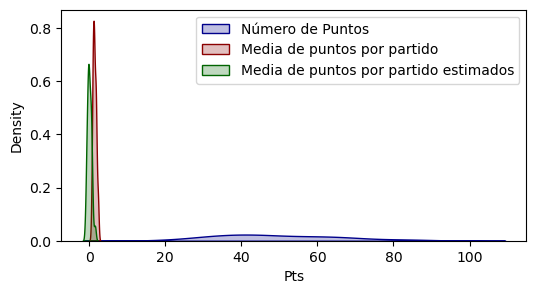

In [119]:
plt.figure(figsize=(6, 3))
sns.kdeplot(df['Pts'], label= 'Número de Puntos', color= 'darkblue', fill = True)
sns.kdeplot(df['Pts/G'], label= 'Media de puntos por partido', color= 'darkred', fill = True)
sns.kdeplot(df['xGD/90'], label= 'Media de puntos por partido estimados', color= 'darkgreen', fill = True)

plt.legend()
plt.show()

Como observamos diferencias significativas entre alguna variable, procederé a hacer pruebas de comparaciones múltiples, con el Test de Nemenyi o el Test de Conover-Iman y así determinaré cuáles de los grupos difieren entre sí.

- Aplico el test de Nemenyi para visualizar una matriz de comparacion entre los valores p de las tres variables.

In [120]:
# Creo el df con los datos y los grupos:
df_anova = pd.DataFrame({
    'Valores': np.concatenate([data5, data6, data7]),
    'Grupos': ['Pts'] * len(data5) + ['Pts/G'] * len(data6) + ['xGD/90'] * len(data7) })

# Realizo el Test de Nemenyi como prueba post hoc:
posthoc = posthoc_nemenyi(df_anova, val_col='Valores', group_col='Grupos')
print(posthoc)


                 Pts         Pts/G        xGD/90
Pts     1.000000e+00  1.160333e-15  9.985114e-56
Pts/G   1.160333e-15  1.000000e+00  2.432762e-13
xGD/90  9.985114e-56  2.432762e-13  1.000000e+00


- Los valores p son muy bajos en todos los casos, (por ejemplo, 1.160333e-15 significa 1.16 x 10^-15).
- Cuanto más bajo es el valor p, más significativa es la diferencia entre las variables comparadas.

- En cuanto a significación estadística: En todos los casos, los valores p son mucho menores que el nivel de significancia típico de 0.05. 
- Esto indica que hay diferencias estadísticamente significativas entre las variables Pts, Pts/G y xGD/90.

Estas diferencias no se pueden atribuir al azar y sugieren que hay variabilidad real entre las variables de Pts, Pts/G y xGD/90.

En el caso de la relación entre Pts vs. Pts/G, sugiere que la media de puntos por partido no es constante y varía entre los equipos. Esto se debe a que un equipo no puede mantener la misma capacidad de juego y seguramente porque compiten con diferentes equipos en cada partido.  

En el caso de la relación entre Pts vs. Pts/G, Es normal puesto que no se pueden predecir únicamente en función de la estimación de goles por partido, sino con la capacidad de los equipos para convertir las oportunidades en goles en goles. Y también influyen en los puntos.

La relación Pts/G vs. xGD/90: La diferencia significativa entre Pts/G y xGD/90 sugiere que la media de puntos por partido no se correlaciona de manera directa con la estimación de goles por partido. Algunos equipos tienen una mayor eficiencia en la conversión de oportunidades en goles, lo que afecta su media de puntos por partido.

En general, veo que hay factores adicionales en juego que influyen en la puntuación de los equipos, y estos factores son estadísticamente significativos. 